In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
# import matplotlib.cm as cm
# import timeit
import numberfun as nf
import numberdata as nd
import distinctipy
import colorcet as cc

In [14]:
# Loads necessary sequence data
nd.load_pseudos()
nd.load_primitives()
nd.load_primpracticals_x()


def load_entropies_data():
    """Load saved perfection entropy values if any have been pre-computed and
    saved."""
    perfection_entropies = []
    try:
        with open("./perfection_entropy_data.txt", "r") as f:
            for line in f:
                perfection_entropies.append(line.split(", "))

        return [(int(p[0]), float(p[1].replace("\n", ""))) for p in\
                 perfection_entropies]
    except FileNotFoundError:
        return None


def confirm_extend(data):
    if data is not None:
        while True:
            confirm = input(
                "A file with pre-calculated perfection entropy values has been\
                    found. Enter 'p' if you want to plot the existing values,\
                        'y' if you want to extend the existing values\
                        or 'n' if you want to calculate them afresh: ").lower()
            if confirm in ['p', 'y', 'n']:
                return confirm
            else:
                print("Invalid input. Please try again.")

        
def values_range():
    while True:
        get_range = int(input(
            "How many new values do you want to calculate? (If this takes too\
                long try fewer values): "))
        if get_range > 0:
            return get_range
        else:
                print("Invalid input. Please enter a positive integer.")


def calculate_range(start, stop):
    return [(n, min(nf.perfection_entropy(int(n)))) for n in nd.PSEUDOS[start:stop]]


def perf_data_builder():
    """Returns lists of pseudo perfect numbers together with minimal
    entropies of their partitions."""

    perfection_entropies = load_entropies_data()
    choice = confirm_extend(perfection_entropies)
    if choice == 'p':
        return perfection_entropies
    elif choice == 'y':
        start = len(perfection_entropies)
        step = values_range()
        stop = start + step
        perfection_entropies.extend(calculate_range(start, stop))
        return perfection_entropies
    else:
        start = 0
        stop = values_range()
    return calculate_range(start, stop)


def mult_data_builder(stop):
    """Builds the data for the multiplicity entropies"""
    values = nd.PRIMITIVES[nd.PRIMITIVES <= stop]
    result = np.vectorize(nf.multiplicity_entropy)(values)
    return np.column_stack((values, result))


In [15]:
perfection_entropies = perf_data_builder()

In [16]:
"""Perfection entropy values are expensive to compute. Save generated ones."""
# def save_entropies_data(perfection_entropies):
#     """Saves generated values."""
#     perfections = ""
#     for i in perfection_entropies:
#         perfections += f"{i[0]}, {min(i[1])}\n"
        
#     with open("C:/Users/danko/iCloudDrive/Projects/Entropy/perfection_entropy_data2.txt", "w") as file:
#         file.write(str(perfection_entropies))
#         print("File saved")

'Perfection entropy values are expensive to compute. Save generated ones.'

In [17]:
"""If the file with saved perfection entropy values has already been created,
you can extend the values here."""
# perfection_entropies.extend(perf_data_builder(start, stop))

'If the file with saved perfection entropy values has already been created,\nyou can extend the values here.'

In [18]:
"""Compute and categorise by multiplicity entropies as well as by prime
factorisation. Only for additional exploration of interaction of prime
divisors with perfections."""

# def group_by_multiplicity(data):
#     """Returns a list of values grouped according to their multiplicity
#     entropies"""
#     unique = set(np.array(data)[:, 1])
#     groups = []
#     for i in unique:
#         groups.append([int(row[0]) for row in data if row[1] == i])
    
#     return sorted(groups, key=lambda x: x[0]) # groups


# def flatten_subset_lists(groups, practical_list):
#     """Combine primitive practical numbers of the form 2^i * prime(k)"""
#     result = []
#     flattened = []
    
#     for sublist in groups:
#         # If sublist is a subset of nd.PRIM_PRACTICALS_X, flatten it
#         if all(item in practical_list for item in sublist):
#             flattened.extend(sublist)  # Flatten and collect subset lists
#         else:
#             result.append(sublist)  # Keep non-subset lists unchanged

#     result.append(flattened)

#     return sorted(result, key=lambda x: x[0])


# def get_group_index(x):
#     """Assigns an x_value to a colour determined by group membership."""
#     for i, group in enumerate(groups):
#         if x in group:
#             return colourmap[i]

# # Group primitive perfect numbers by unique multiplicity entropy values
# multiplicity_entropies = mult_data_builder(perfection_entropies[-1][0] + 1)
# groups = group_by_multiplicity(multiplicity_entropies)
# # Combine primitive practical numbers of the form 2^i * prime(k)
# groups = flatten_subset_lists(groups, nd.PRIM_PRACTICALS_X)
# # Get colour map for grouped primitive perfect numbers
# colourmap = distinctipy.get_colors(len(groups), pastel_factor=0.5)
# # # Create category labels
# # group_labels = ["2^i * prime(k)",]
# # mulitplicities = [nf.factorint(g[0]) for g in groups[1:]]
# # group_labels.extend(["".join([f"{v}," for v in m.values()]).rstrip(" , ") for m in mulitplicities])

'Compute and categorise by multiplicity entropies as well as by prime\nfactorisation. Only for additional exploration of interaction of prime\ndivisors with perfections.'

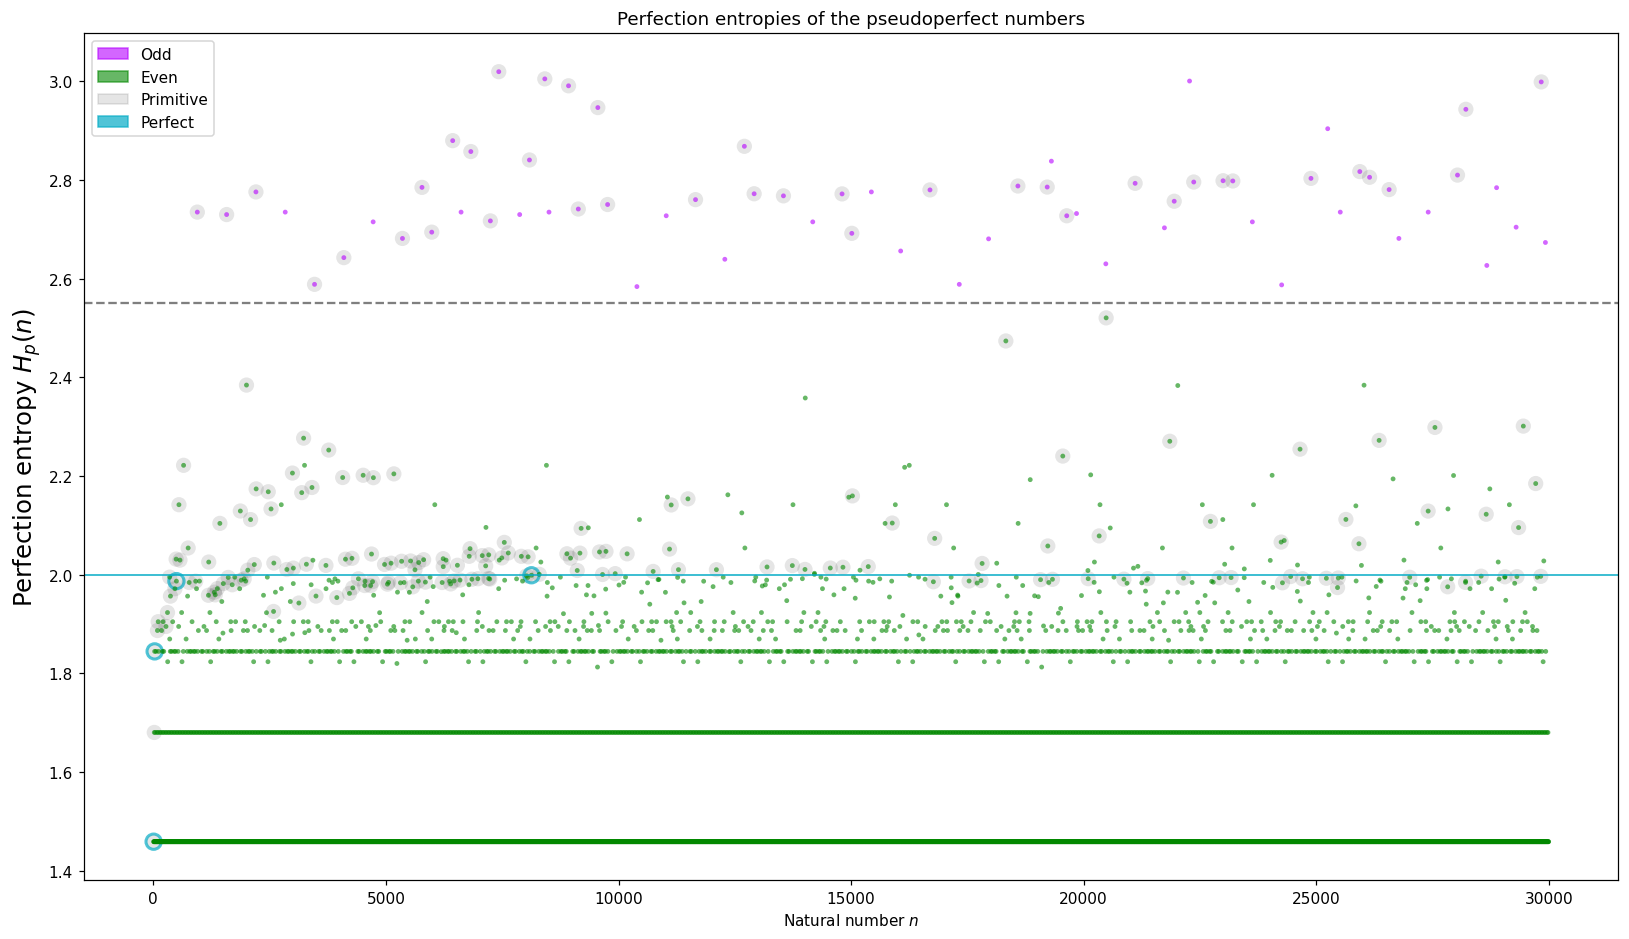

In [19]:
# Get perfection entropies for plotting
x_1 = np.array([p[0] for p in perfection_entropies])
y_1 = np.array([p[1] for p in perfection_entropies])

# Extract primitive pseudos for highlighting
x_2 = x_1[np.isin(x_1, nd.PRIMITIVES)]
y_2 = y_1[np.isin(x_1, nd.PRIMITIVES)]

x_3 = x_1[np.isin(x_1, nd.PERFECTS)]
y_3 = y_1[np.isin(x_1, nd.PERFECTS)]

# Create distinct, colour-blind accessible colourmap
cmap = cc.m_glasbey_bw_minc_20_minl_30.colors[:8]

# Create colourmap to indicate parity
par_cols = [cmap[1] if n % 2 == 0 else cmap[2] for n in x_1]

# # # Colourmap to indicate primitives
# # prim_cols = ["g" for n in x_1]


# Plotting
plt.figure(figsize=(18, 10), dpi=110)
plt.scatter(x_2, y_2, color='k', s=100, edgecolor='none', alpha=0.1)
plt.scatter(x_3, y_3, color='none', s=100, edgecolor=cmap[3], alpha=0.7, linewidth=2)
plt.scatter(x_1, y_1, color=par_cols, s=10, edgecolor='none', alpha=0.6)
plt.axhline(2, color=cmap[3], linewidth=1)
plt.axhline(2.55, color='k', linestyle='--', alpha = 0.5)

# Labels
plt.xlabel('Natural number $n$')
plt.ylabel(r'Perfection entropy $H_p(n)$', fontsize=16)
plt.title('Perfection entropies of the pseudoperfect numbers')

# Define the proxy artists for the legend
odd_patch = mpatches.Patch(color=cmap[2], label='Odd', alpha=0.6)
even_patch = mpatches.Patch(color=cmap[1], label='Even', alpha=0.6)
prim_patch = mpatches.Patch(color='k', label='Primitive', alpha=0.1)
perf_patch = mpatches.Patch(color=cmap[3], label='Perfect', alpha=0.7)

# Add legend
plt.legend(handles=[odd_patch, even_patch, prim_patch, perf_patch])
plt.savefig("./Perfection_entropies.png", bbox_inches='tight')
plt.show()

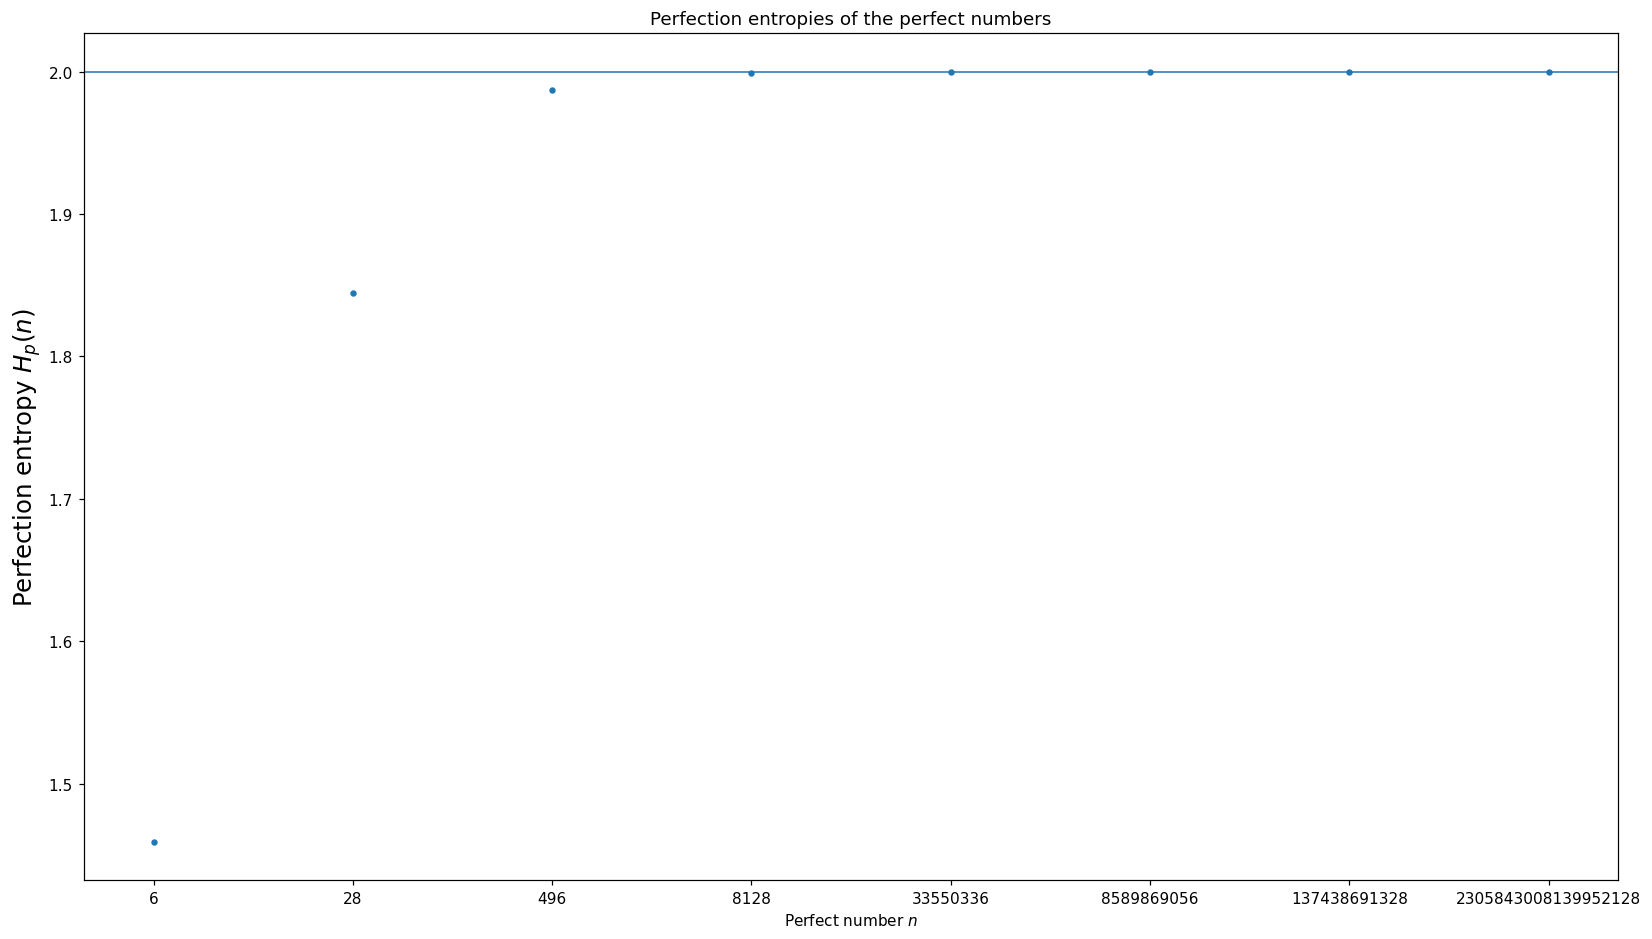

In [20]:
perf = [nf.perfection_entropy(n) for n in nd.PERFECTS[:8]]

plt.figure(figsize=(18, 10), dpi=110)
plt.scatter(range(len(perf)), perf, s=10)
plt.xticks(range(len(perf)), nd.PERFECTS[:8])
plt.axhline(2, lw=1)

# Labels
plt.xlabel('Perfect number $n$')
plt.ylabel(r'Perfection entropy $H_p(n)$', fontsize=16)
plt.title('Perfection entropies of the perfect numbers')
plt.show()

In [21]:
# k = nf.perfection_entropy(240, False)
# plt.figure(figsize=(18, 10), dpi=110)
# plt.scatter(range(len(k)), k, s=1, alpha=.6)

In [22]:
# weird_perfections = ""
# for i in perfection_entropies:
#     if min(i[1]) != i[1][0]:
#         if i[1].index(min(i[1])) > 2:
#             weird_perfections += f"{i[0]}, {i[1]}, {i[1].index(min(i[1]))}\n"


# with open("C:/Users/danko/iCloudDrive/Projects/Entropy/weird_perfections.txt", "w") as file:
#     file.write(weird_perfections)

In [23]:
# d = np.array([(np.prod([(p**(e+1) - 1) / (p-1) for p, e in primes.items()], dtype=np.int64)/2)
#               for primes in [nf.]])